<a href="https://colab.research.google.com/github/saharudro/Machine-Learning-Project/blob/main/Iris_Classification(1st-Project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [720]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os

#Dataset Information
1. The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.
2. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

Attribute Information:

*   sepal length in cm
*   sepal width in cm
*   petal length in cm
*   petal width in cm




class: -- Iris Setosa -- Iris Versicolour -- Iris Virginica

#Loading the dataset

In [721]:
data=pd.read_csv('/content/Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [722]:
#delete the column
#data=data.drop(columns=['Id'])
#data.drop('Id',axis=1,inplace=True)
#data.head()

In [723]:
#to display stats about data
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [724]:
#to display basic info about datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [725]:
#to display no. of sample on each class
data["Species"].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


#Preprocessing the dataset

In [726]:
data.shape

(150, 6)

In [727]:
# check for null values
data.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [728]:
data.duplicated().sum()

np.int64(0)

In [729]:
#data.drop_duplicates(inplace=True)

In [730]:
data.shape

(150, 6)

#Exploratory Data Analysis

In [731]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [732]:
numeric_columns=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
categorical_columns=['Species']

'for col in numeric_columns:\n  plt.figure(figsize=(5,5))\n  sns.histplot(data[col],kde=True,bins=20)\n  plt.show()'

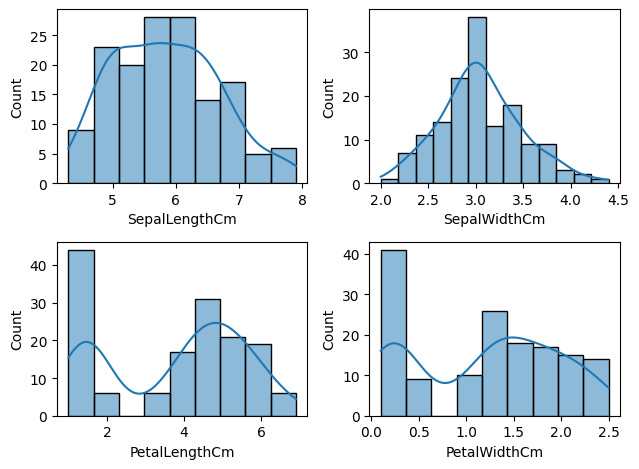

In [733]:
#Histograph
def plotting(var,num):
  plt.subplot(2,2,num)
  sns.histplot(data[var],kde=True)
plotting('SepalLengthCm',1)
plotting('SepalWidthCm',2)
plotting('PetalLengthCm',3)
plotting('PetalWidthCm',4)
plt.tight_layout()

"""for col in numeric_columns:
  plt.figure(figsize=(5,5))
  sns.histplot(data[col],kde=True,bins=20)
  plt.show()"""

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

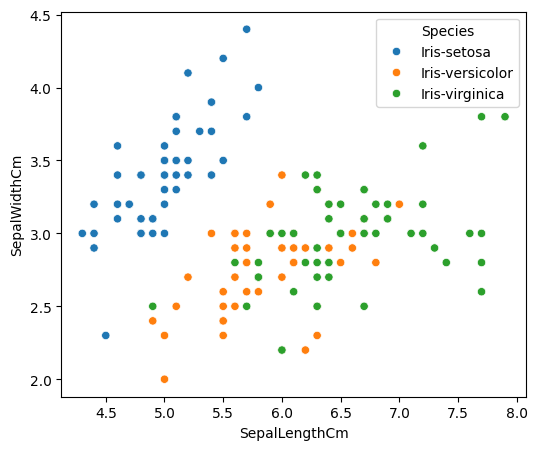

In [734]:
#scatterplot
plt.figure(figsize=(6,5))
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',hue='Species',data=data)

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

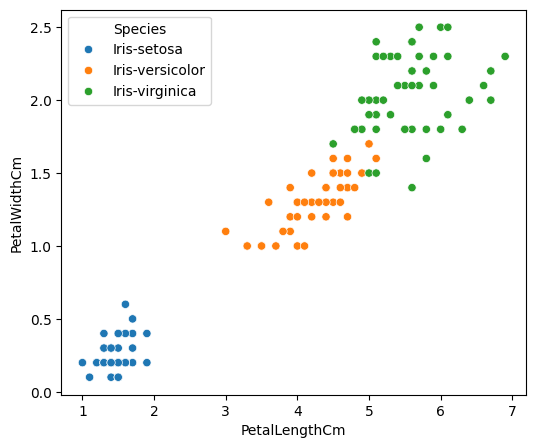

In [735]:
plt.figure(figsize=(6,5))
sns.scatterplot(x='PetalLengthCm',y='PetalWidthCm',hue='Species',data=data)

<Axes: xlabel='SepalLengthCm', ylabel='PetalLengthCm'>

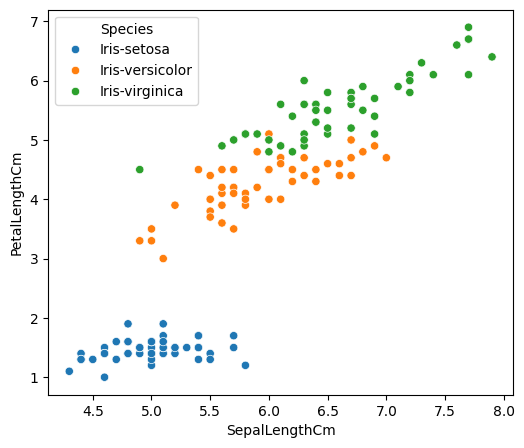

In [736]:
plt.figure(figsize=(6,5))
sns.scatterplot(x='SepalLengthCm',y='PetalLengthCm',hue='Species',data=data)

<Axes: xlabel='SepalWidthCm', ylabel='PetalWidthCm'>

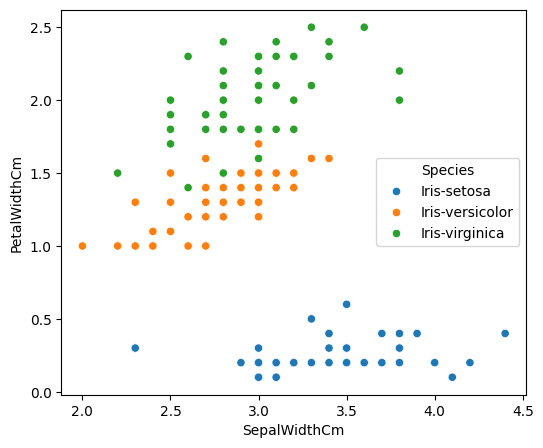

In [737]:
plt.figure(figsize=(6,5))
sns.scatterplot(x='SepalWidthCm',y='PetalWidthCm',hue='Species',data=data)

#Coorelation Matrix
A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. The value is in the range of -1 to 1. If two varibles have high correlation, we can neglect one variable from those two.

In [738]:
data.corr(numeric_only=True)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


<Axes: >

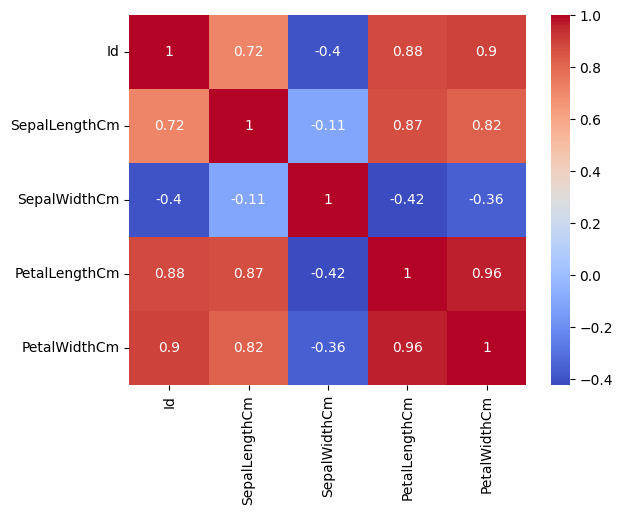

In [739]:
sns.heatmap(data.corr(numeric_only=True),annot=True,cmap='coolwarm')

#Label Encoder
In machine learning, we usually deal with datasets which contains multiple labels in one or more than one columns. These labels can be in the form of words or numbers. Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form

In [740]:
data["Species"] = data["Species"].map({"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2})

In [741]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [742]:
"""from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
df.head()"""

"from sklearn.preprocessing import LabelEncoder\nle = LabelEncoder()\ndf['Species'] = le.fit_transform(df['Species'])\ndf.head()"

#Model Training

In [743]:
from sklearn.model_selection import train_test_split
# train - 70
# test - 20
X = data.drop(columns=['Species'])
Y = data['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

In [744]:
# logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

# model training
model.fit(x_train, y_train)

LogisticRegression()

In [745]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  100.0


In [746]:
# knn - k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

# model training
model.fit(x_train, y_train)

KNeighborsClassifier()

In [747]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  100.0


In [748]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

# model training
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [749]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  100.0


In [750]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

# Train models
model.fit(x_train, y_train)

RandomForestClassifier()

In [751]:
# print metric to get performance
print("Random Forest Accuracy: ",model.score(x_test, y_test) * 100)

Random Forest Accuracy:  100.0


In [752]:
#SVC
from sklearn.svm import SVC
model=SVC()

# Train models
model.fit(x_train, y_train)

SVC()

In [753]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  100.0


In [754]:
# Linear Discriminant Analysis Algorithm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model=LinearDiscriminantAnalysis()

# Train models
model.fit(x_train, y_train)

LinearDiscriminantAnalysis()

In [755]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  100.0


In [756]:
y_predicted=model.predict(x_test)

In [757]:
y_predicted

array([1, 1, 1, 1, 0, 1, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0,
       0, 2, 2, 2, 0, 0, 1, 0])